In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('bor3hci.csv')

In [3]:
dataset.head()

,Date,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily,Unnamed: 9
0,01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0,NaN
1,01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0,NaN
2,01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0,NaN
3,01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0,NaN
4,01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0,NaN


In [4]:
dataset.shape

(272, 10)

In [5]:
dataset['Date'].head()

0    01/05/92
1    01/06/92
2    01/07/92
3    01/08/92
4    01/09/92
Name: Date, dtype: object

In [6]:
data=pd.to_datetime(dataset['Date'])

In [7]:
#dataset.head()
dataset=dataset.set_index(['Date'])


In [8]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily,Unnamed: 9
Date,,,,,,,,,
01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0,NaN
01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0,NaN
01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0,NaN
01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0,NaN
01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0,NaN


In [9]:
#dataset=dataset.drop('Date', axis=1)
dataset = dataset.drop((c for c in dataset.columns[-1:]), axis=1)

In [10]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0
01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0


In [11]:
dataset.to_csv('bori3hci.csv')

In [12]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0
01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0


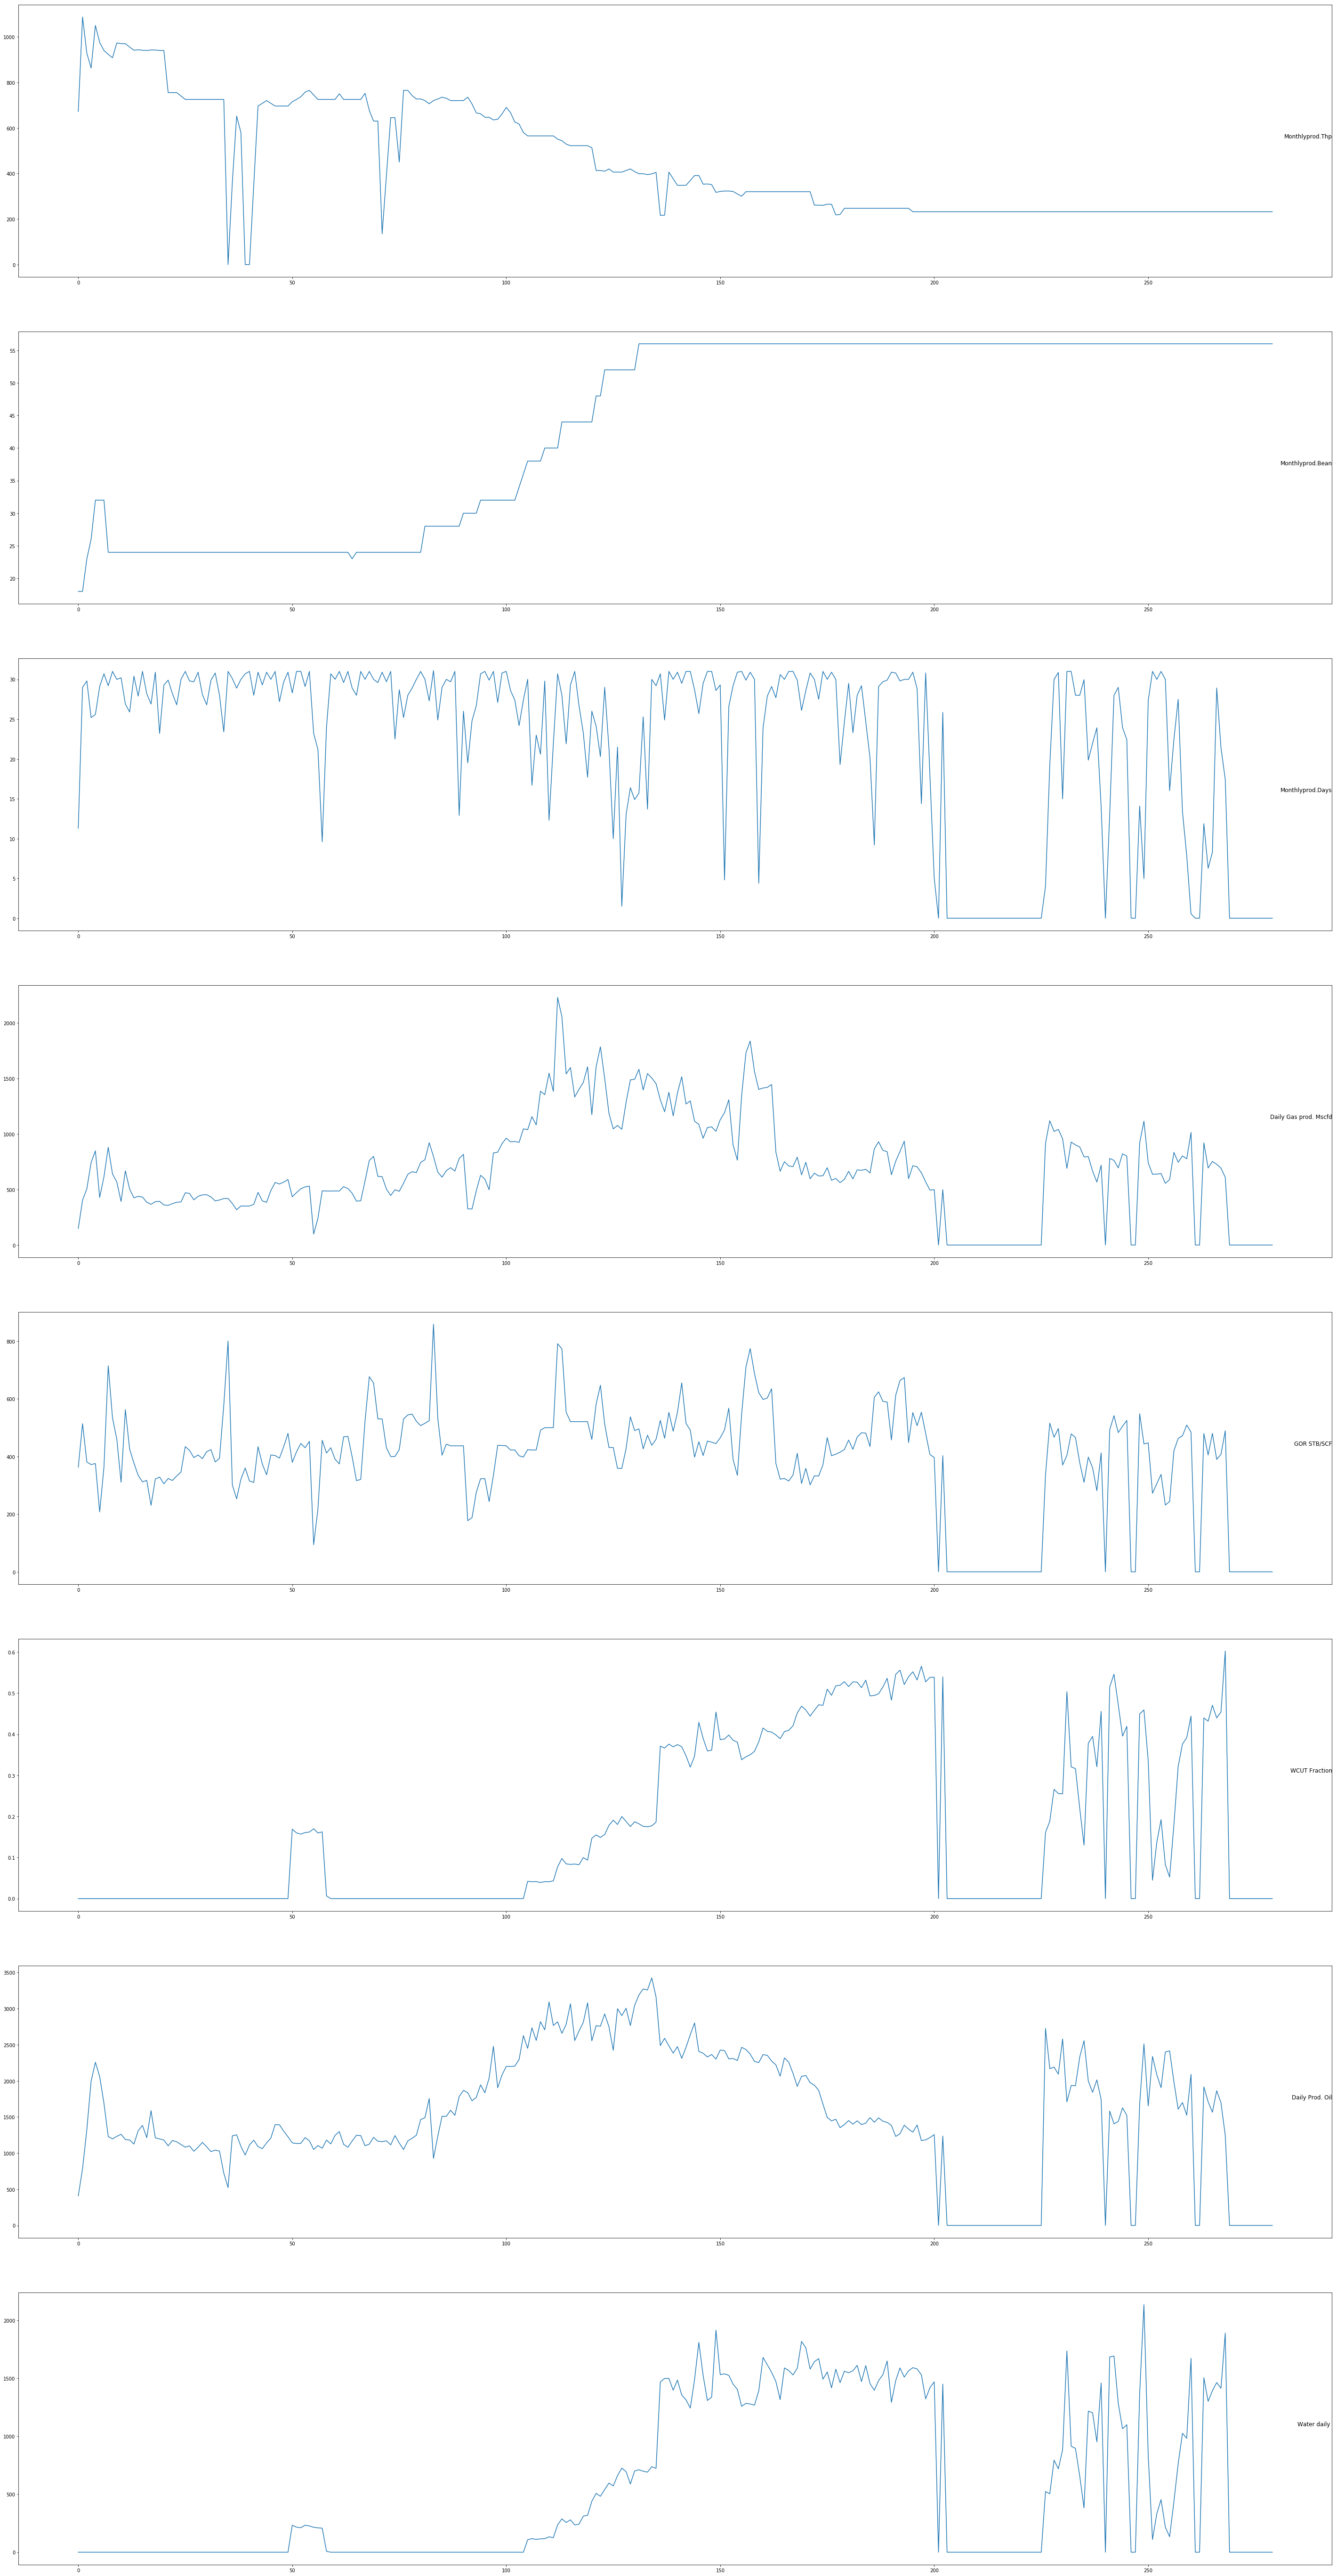

In [13]:
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1,2,3,4,5,6,7]
i = 1
# plot each column
plt.figure(figsize=(50,100))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [14]:
#dataset.values

In [15]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.layers import DropConnect

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[14,15,16,17,18,22,23,
           #                    24,25,26,27]], axis=1, inplace=True)
#print(reframed.head())

Using TensorFlow backend.


In [16]:
reframed[reframed.columns[2]].head()
reframed.shape

(279, 16)

In [17]:
# split into train and test sets
values = reframed.values
n_train_months = (21*12) +3
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-8], train[:, -8:]
test_X, test_y = test[:, :-8], test[:, -8:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(255, 1, 8) (255, 8) (24, 1, 8) (24, 8)


Train on 255 samples, validate on 24 samples
Epoch 1/500
 - 2s - loss: 0.4431 - val_loss: 0.3236
Epoch 2/500
 - 0s - loss: 0.4195 - val_loss: 0.3139
Epoch 3/500
 - 0s - loss: 0.3905 - val_loss: 0.3021
Epoch 4/500
 - 0s - loss: 0.3555 - val_loss: 0.2919
Epoch 5/500
 - 0s - loss: 0.3241 - val_loss: 0.2980
Epoch 6/500
 - 0s - loss: 0.2947 - val_loss: 0.3040
Epoch 7/500
 - 0s - loss: 0.2712 - val_loss: 0.3098
Epoch 8/500
 - 0s - loss: 0.2577 - val_loss: 0.3152
Epoch 9/500
 - 0s - loss: 0.2496 - val_loss: 0.3205
Epoch 10/500
 - 0s - loss: 0.2439 - val_loss: 0.3228
Epoch 11/500
 - 0s - loss: 0.2391 - val_loss: 0.3235
Epoch 12/500
 - 0s - loss: 0.2343 - val_loss: 0.3240
Epoch 13/500
 - 0s - loss: 0.2308 - val_loss: 0.3243
Epoch 14/500
 - 0s - loss: 0.2282 - val_loss: 0.3244
Epoch 15/500
 - 0s - loss: 0.2264 - val_loss: 0.3247
Epoch 16/500
 - 0s - loss: 0.2253 - val_loss: 0.3241
Epoch 17/500
 - 0s - loss: 0.2247 - val_loss: 0.3218
Epoch 18/500
 - 0s - loss: 0.2241 - val_loss: 0.3179
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.1978 - val_loss: 0.2630
Epoch 155/500
 - 0s - loss: 0.1970 - val_loss: 0.2631
Epoch 156/500
 - 0s - loss: 0.1977 - val_loss: 0.2631
Epoch 157/500
 - 0s - loss: 0.1959 - val_loss: 0.2627
Epoch 158/500
 - 0s - loss: 0.1956 - val_loss: 0.2619
Epoch 159/500
 - 0s - loss: 0.1946 - val_loss: 0.2615
Epoch 160/500
 - 0s - loss: 0.1949 - val_loss: 0.2617
Epoch 161/500
 - 0s - loss: 0.1932 - val_loss: 0.2621
Epoch 162/500
 - 0s - loss: 0.1927 - val_loss: 0.2620
Epoch 163/500
 - 0s - loss: 0.1919 - val_loss: 0.2618
Epoch 164/500
 - 0s - loss: 0.1911 - val_loss: 0.2615
Epoch 165/500
 - 0s - loss: 0.1911 - val_loss: 0.2611
Epoch 166/500
 - 0s - loss: 0.1899 - val_loss: 0.2610
Epoch 167/500
 - 0s - loss: 0.1893 - val_loss: 0.2609
Epoch 168/500
 - 0s - loss: 0.1889 - val_loss: 0.2605
Epoch 169/500
 - 0s - loss: 0.1869 - val_loss: 0.2601
Epoch 170/500
 - 0s - loss: 0.1859 - val_loss: 0.2598
Epoch 171/500
 - 0s - loss: 0.1855 - val_loss: 0.2599
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1145 - val_loss: 0.2239
Epoch 307/500
 - 0s - loss: 0.1148 - val_loss: 0.2240
Epoch 308/500
 - 0s - loss: 0.1140 - val_loss: 0.2247
Epoch 309/500
 - 0s - loss: 0.1140 - val_loss: 0.2242
Epoch 310/500
 - 0s - loss: 0.1161 - val_loss: 0.2225
Epoch 311/500
 - 0s - loss: 0.1138 - val_loss: 0.2219
Epoch 312/500
 - 0s - loss: 0.1144 - val_loss: 0.2209
Epoch 313/500
 - 0s - loss: 0.1140 - val_loss: 0.2197
Epoch 314/500
 - 0s - loss: 0.1145 - val_loss: 0.2206
Epoch 315/500
 - 0s - loss: 0.1136 - val_loss: 0.2195
Epoch 316/500
 - 0s - loss: 0.1127 - val_loss: 0.2185
Epoch 317/500
 - 0s - loss: 0.1138 - val_loss: 0.2189
Epoch 318/500
 - 0s - loss: 0.1119 - val_loss: 0.2186
Epoch 319/500
 - 0s - loss: 0.1132 - val_loss: 0.2169
Epoch 320/500
 - 0s - loss: 0.1130 - val_loss: 0.2172
Epoch 321/500
 - 0s - loss: 0.1127 - val_loss: 0.2189
Epoch 322/500
 - 0s - loss: 0.1124 - val_loss: 0.2175
Epoch 323/500
 - 0s - loss: 0.1118 - val_loss: 0.2152
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0957 - val_loss: 0.1442
Epoch 459/500
 - 0s - loss: 0.0963 - val_loss: 0.1439
Epoch 460/500
 - 0s - loss: 0.0953 - val_loss: 0.1432
Epoch 461/500
 - 0s - loss: 0.0959 - val_loss: 0.1431
Epoch 462/500
 - 0s - loss: 0.0957 - val_loss: 0.1435
Epoch 463/500
 - 0s - loss: 0.0951 - val_loss: 0.1435
Epoch 464/500
 - 0s - loss: 0.0964 - val_loss: 0.1437
Epoch 465/500
 - 0s - loss: 0.0954 - val_loss: 0.1431
Epoch 466/500
 - 0s - loss: 0.0960 - val_loss: 0.1428
Epoch 467/500
 - 0s - loss: 0.0967 - val_loss: 0.1428
Epoch 468/500
 - 0s - loss: 0.0956 - val_loss: 0.1423
Epoch 469/500
 - 0s - loss: 0.0947 - val_loss: 0.1419
Epoch 470/500
 - 0s - loss: 0.0945 - val_loss: 0.1425
Epoch 471/500
 - 0s - loss: 0.0945 - val_loss: 0.1423
Epoch 472/500
 - 0s - loss: 0.0949 - val_loss: 0.1418
Epoch 473/500
 - 0s - loss: 0.0956 - val_loss: 0.1415
Epoch 474/500
 - 0s - loss: 0.0948 - val_loss: 0.1409
Epoch 475/500
 - 0s - loss: 0.0951 - val_loss: 0.1407
Epoch 476/500
 - 0s - loss: 

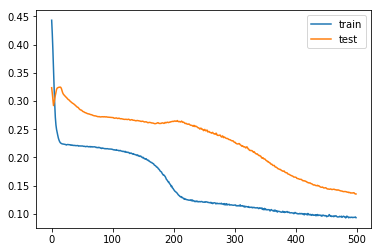

In [18]:
# design network
model = Sequential()
model.add(LSTM(90, activation='softmax',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.019))
model.add(Dense(120,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.02))
model.add(Dense(8,activation='relu'))
model.compile(optimizer='adam', loss='mae')
# fit network
history = model.fit(train_X,train_y,epochs=500,validation_data=(test_X, test_y),verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [19]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:,8:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,4:7]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 8))
inv_y = concatenate((test_y, test_X[:,8:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 418.918


In [20]:
#print(yhat.shape[0])
#print(yhat.shape)
#print(test_X.shape)

In [21]:
i = 0
h = int(yhat.shape[0])
while i < h:
    x = yhat
    x = x.reshape((x.shape[0], 1, x.shape[1]))
    yhat = model.predict(x)
    i=i+1

In [22]:
xhat = yhat
xhat = concatenate((xhat, test_X[:,8:]), axis=1)
xhat = scaler.inverse_transform(xhat)
hcihat = xhat[:,4:7] 
print(hcihat)

[[3.9000272e+02 0.0000000e+00 1.2900710e+03]
 [3.8790439e+02 0.0000000e+00 1.2806498e+03]
 [3.4118225e+02 0.0000000e+00 1.0915043e+03]
 [4.7361414e+02 4.1381627e-01 2.2336042e+03]
 [4.7350146e+02 4.1383308e-01 2.2331240e+03]
 [4.7381183e+02 4.1376266e-01 2.2344336e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [4.7381302e+02 4.1375986e-01 2.2344385e+03]
 [4.7371655e+02 4.1384166e-01 2.2340615e+03]
 [4.7376306e+02 4.1381401e-01 2.2342488e+03]
 [4.7381787e+02 4.1374955e-01 2.2344524e+03]
 [4.7379028e+02 4.1378212e-01 2.2343506e+03]
 [4.7379544e+02 4.1378468e-01 2.2343740e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.7385526e+02 0.0000000e+00 1.2197617e+03]
 [3.738552

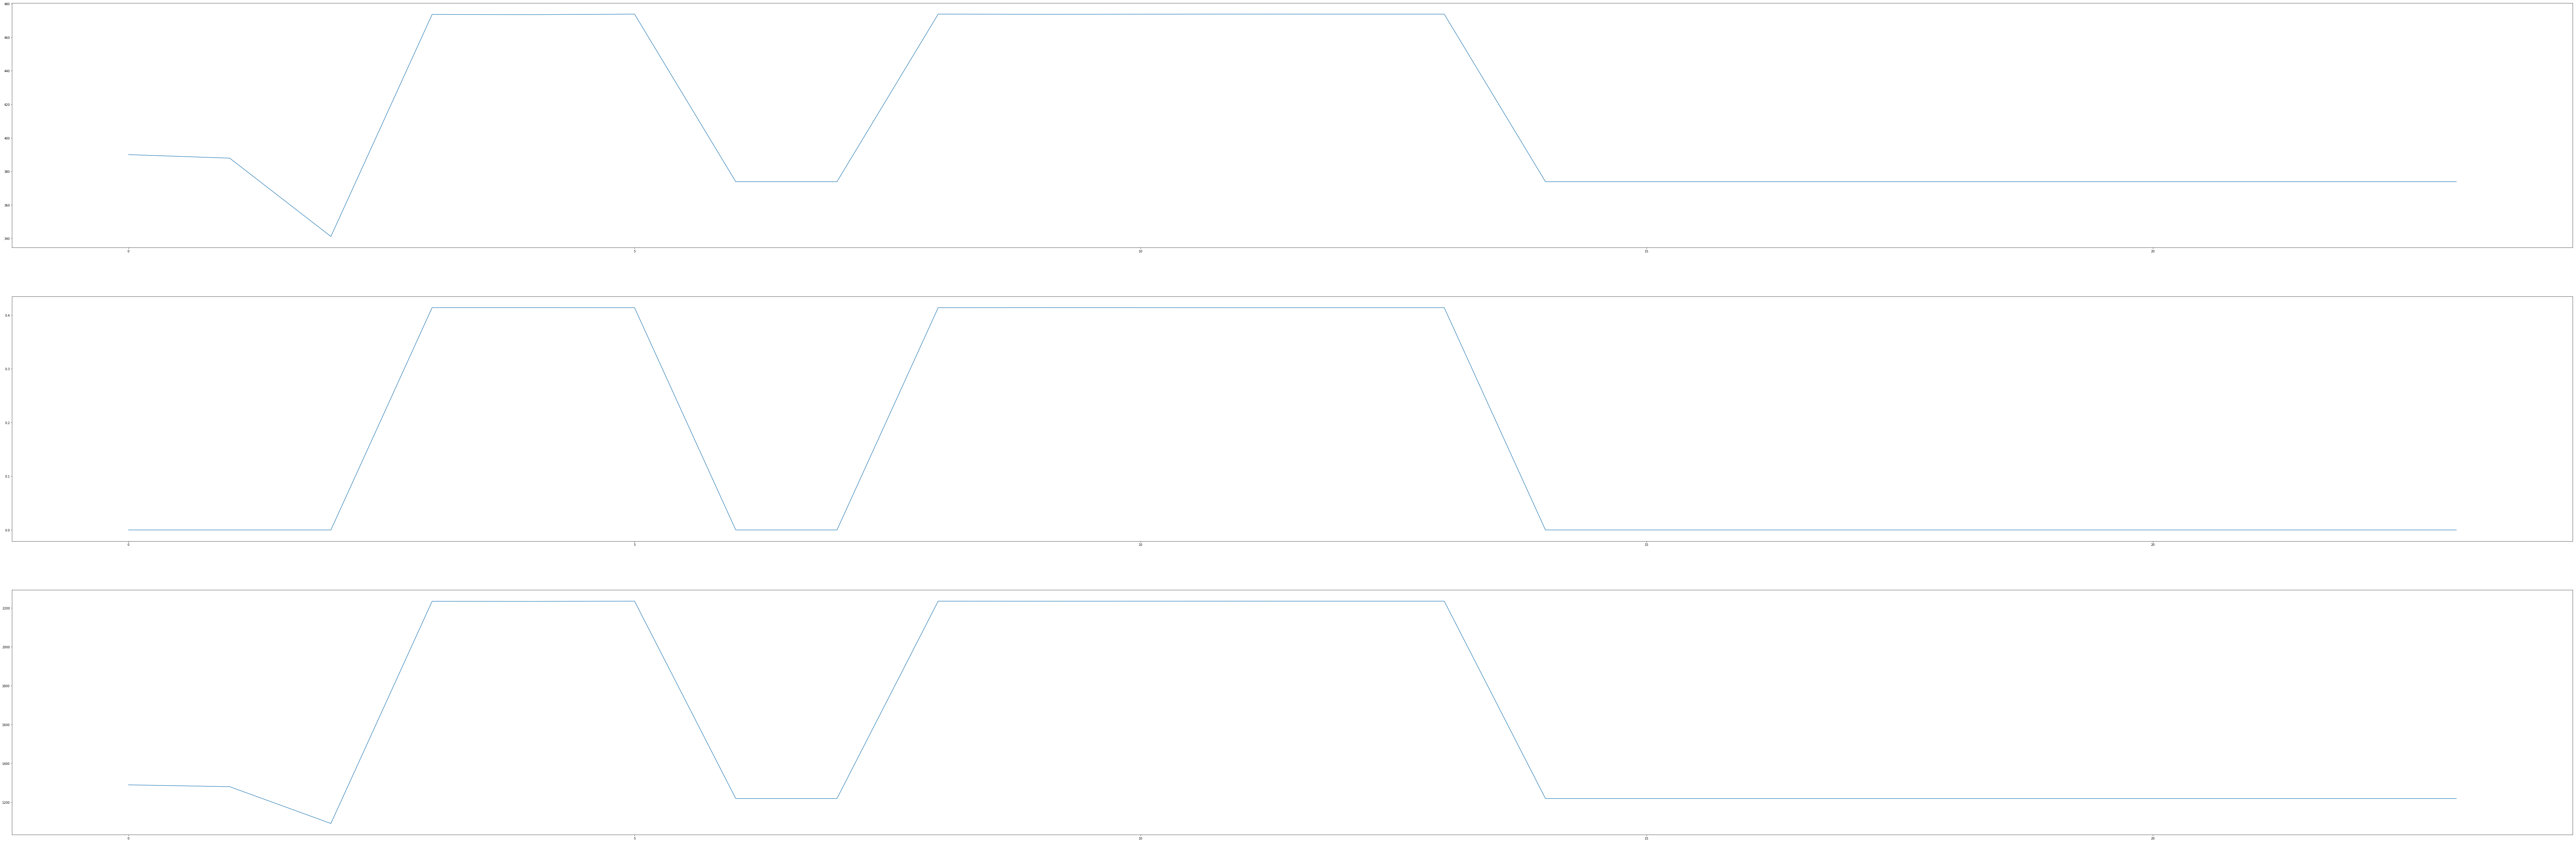

In [23]:
groups = [4,5,6]
i = 1
# plot each column
plt.figure(figsize=(150,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(xhat[:,group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


In [24]:
new = dataset

In [25]:
new.shape

(280, 8)

In [26]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [27]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [28]:
nin=new.index[-1]
print(nin)

01/12/2014


In [29]:
newxhat= pd.DataFrame(xhat,columns=[c for c in new.columns]) 

In [30]:
newxhat.shape

(24, 8)

In [31]:
new=new.append(newxhat)

In [32]:
new.shape

(304, 8)

In [33]:
#new=new.join(data)

In [34]:
new.shape

(304, 8)

In [35]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
                 14,           15,           16,           17,           18,
                 19,           20,           21,           22,           23],
      dtype='object', length=304)

In [36]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/09/1991,672.0,18.0,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087.0,18.0,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928.0,23.0,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863.0,26.0,25.2,742.777778,371.964548,0.0,1996.904762,0.0


In [37]:
newbori = new.to_csv('newboric.csv')